<a href="https://colab.research.google.com/github/mudesir/DS-Unit-2-Applied-Modeling/blob/master/Unit_2_Build_Mudesir_Suleyman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unit 2 Build up

## Hotel booking demand Dataset  (kaggle)

## Description of Varibels in the columns

Variable | Description
--- | ---
ADR | Average Daily Rate
Adults | Number of Adults
Agent	|	ID of the travel agency
ArrivalDateDayOfMonth	|	Day of the month of the arrival date	
ArrivalDateMonth	|	Month of arrival date
ArrivalDateWeekNumber	| Week number of the arrival date	
ArrivalDateYear	|	Year of arrival date
AssignedRoomType	|	Code for the type of room assigned to the booking
Babies	|	Number of babies	
BookingChanges	|	Number of changes
Children	|	Number of children	
Company	|	ID of the company made the booking
Country	|	Country of origin 
CustomerType	|	Type of booking
DaysInWaitingList	|	Number of days the booking was in the waiting list 
DepositType	|	Indication on if the customer made a deposit to guarantee the booking
DistributionChannel	|	Booking distribution channel
IsCanceled	|	Value indicating if the booking was canceled 
IsRepeatedGuest	|	Value indicating if the booking name was from a repeated guest 
LeadTime	|	Number of days that elapsed between the entering and the arrival date			
MarketSegment	|	Market segment designation
Meal	|	Type of meal booked
PreviousBookingsNotCanceled	|	Number of previous bookings not cancelled
PreviousCancellations	|	Number of previous bookings that were cancelled 
RequiredCardParkingSpaces	|	Number of car parking spaces required by the customer	
ReservationStatus	|	Reservation last status
ReservationStatusDate	|	Date at which the last status was set
ReservedRoomType	|	Code of room type reserved
AssignedRoomType | Code of room type assigned
StaysInWeekendNights	|	Number of weekend nights 
StaysInWeekNights	|	Number of week nights 
TotalOfSpecialRequests	|	Number of special requests made by the customer 

In [35]:
# import and upload dataset
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()


Saving hotel_reserve.zip to hotel_reserve (1).zip


In [36]:
df = pd.read_csv('hotel_reserve.zip')
df.shape

(119390, 32)

In [37]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [38]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [40]:
# choose a target to predict, and check its distrbution
# How many of is canceled after resrvation
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [41]:
df['is_canceled'].describe()

count    119390.000000
mean          0.370416
std           0.482918
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64

In [42]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

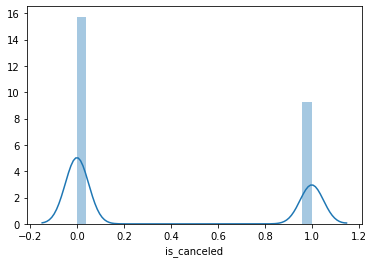

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['is_canceled']);

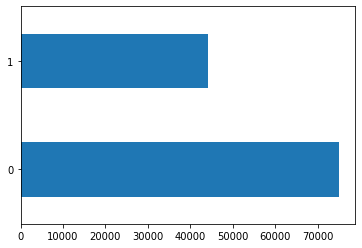

In [44]:
df['is_canceled'].value_counts().plot(kind='barh');

How the target is distrbuted

In [45]:
y=df['is_canceled']
y.nunique()

2

In [46]:
df.shape, y.shape

((119390, 32), (119390,))

In [47]:
y.value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [48]:
# explore and clean data
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [49]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [50]:
# what might make sense to drop
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [51]:
df['adr'].nunique()

8879

In [52]:
df['country'].nunique()

177

In [53]:
df = df.drop(columns=['reservation_status', 'country', 'agent', 'company', 
                      'reservation_status', 'adr'])
df.isna().sum().sort_values()

hotel                             0
required_car_parking_spaces       0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
total_of_special_requests         0
market_segment                    0
babies                            0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year                 0
lead_time                         0
is_canceled                       0
meal                              0
reservation_status_date           0
children                          4
dtype: int64

In [54]:
df = df.dropna()

In [55]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
dtype: int64

In [56]:
df.shape, y.shape

((119386, 27), (119390,))

In [62]:
y = y[df.index]
y.shape

(119386,)

In [63]:
# Time based split
df['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119386, dtype: datetime64[ns]

In [64]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119386, dtype: datetime64[ns]

In [59]:
train = df[df['reservation_status_date'].dt.year <= 2016]
val =  df[(df['reservation_status_date'].dt.year == 2017) & (df['reservation_status_date'].dt.month <= 3)]
test = df[(df['reservation_status_date'].dt.year == 2017) & (df['reservation_status_date'].dt.month > 3)]

In [65]:
train.shape, val.shape, test.shape

((82903, 27), (14935, 27), (21548, 27))

In [77]:
target = 'is_canceled'
features = df.drop(columns=[target])


In [70]:
# check leakage
# try a shallow decision tree as a fast, first model
%matplotlib inline
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

target = 'is_canceled'
features = train.columns.drop([target, 'reservation_status_date'])

X_train = train[features]
y_train = train[features]
X_val = val[features]
y_val = val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=3)
)




In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [72]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

frc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
              
              

ValueError: ignored

In [73]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print('Train accuracy ', log_model.score(X_train, y_train))
print('Test accuracy ', log_model.score(X_test, y_test))


In [ ]:
print('Train accuracy ', rfc_model.score(X_train, y_train))
print('Test accuracy ', rfc_model.score(X_test, y_test))


In [69]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 2.6MB/s 


In [ ]:
import numpy as np

from sklearn.preprocessing import CategoricalEncoder